# **QSAR Model Building of PRKCB Inhibitors**



# Read in data

In [ ]:
import pandas as pd

In [ ]:
dataset = pd.read_csv('/content/PRKCB_pIC50_pubchem_fp.csv')
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.841638
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.619789
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.732828
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.725842
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.623423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000
811,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,8.221849
812,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.301030
813,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.301030


In [ ]:
X = dataset.drop(['pIC50'], axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
811,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
812,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
813,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
Y = dataset.iloc[:,-1]
Y

,pIC50
0,5.841638
1,6.619789
2,5.732828
3,5.725842
4,5.623423
...,...
810,6.000000
811,8.221849
812,6.301030
813,6.301030


# Remove low variance features

In [ ]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP21,PubchemFP143,PubchemFP144,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP803,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP868
0,1,1,1,1,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,1,1,1,1,1,0,0,1,0,1,...,0,0,1,0,0,0,1,0,0,0
2,1,1,1,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,1,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,1,1,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
811,0,0,0,1,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
812,0,0,0,1,1,0,0,1,0,1,...,1,0,1,0,1,0,1,1,1,0
813,1,1,1,1,1,0,0,1,0,1,...,1,0,1,0,1,0,1,1,1,0


In [ ]:
X.to_csv('descriptor_list.csv', index = False)

In [ ]:
# In the app, use the following to get this same descriptor list
# of 199 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.908978223381552

## Model Prediction

In [ ]:
Y_pred = model.predict(X)
Y_pred

array([5.81481247, 6.5213401 , 5.84938218, 5.86585955, 5.73389758,
       4.59525505, 5.9222346 , 5.92604048, 5.67439182, 5.93277787,
       5.86585955, 6.00178818, 5.53386542, 6.4633007 , 4.59747729,
       5.65571625, 7.38572502, 7.38572502, 7.64923081, 7.64923081,
       7.22677542, 7.22677542, 5.50688683, 5.50688683, 6.51019618,
       6.51019618, 7.95197214, 7.95197214, 8.27329381, 8.27329381,
       7.57580988, 7.57580988, 7.56363285, 7.56363285, 7.74614675,
       7.74614675, 7.87631318, 7.87631318, 7.76888334, 7.76888334,
       7.60512772, 7.60512772, 7.48514781, 7.48514781, 7.85873177,
       7.85873177, 7.74614675, 7.74614675, 6.99901915, 6.99901915,
       7.38572502, 7.38572502, 4.52761986, 4.52761986, 6.60089636,
       6.60089636, 7.64923081, 7.64923081, 6.76178545, 6.76178545,
       5.24243394, 5.24243394, 6.08341253, 6.08341253, 7.22677542,
       7.22677542, 7.22677542, 7.22677542, 7.41770264, 7.41770264,
       7.38572502, 7.38572502, 6.89094299, 4.12267168, 4.12267

## Model Performance

In [ ]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.16
Coefficient of determination (R^2): 0.91


# Data Visualization (Experimental vs Predicted pIC50 for Training Data)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

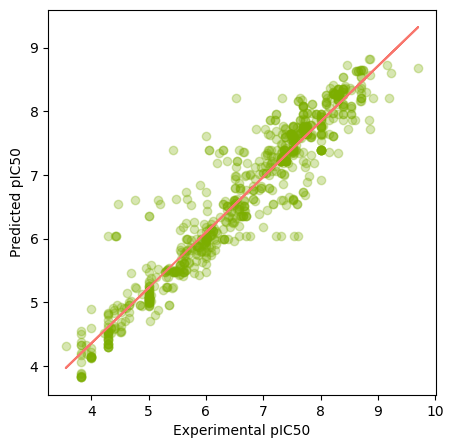

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pIC50')
plt.xlabel('Experimental pIC50')

# Save Model as Pickle Object

In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('PRKCB_model.pkl', 'wb'))